# How are the hits we get back affected by OGT and 16s scores for blast vs diamond

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('whitegrid')

In [47]:
df = pd.read_csv('../data/analysis/blast_vs_diamond_hits.csv')

In [48]:
df.columns

Index(['thermo_index', 'meso_index', 'local_E_value',
       'scaled_local_query_percent_id', 'scaled_local_symmetric_percent_id',
       'local_gap_compressed_percent_id', 'local_average_coverage', 'del_ogt',
       'pair_blast', 'pw_space_blast', 'hits_blast', 'execution_time_blast',
       'pair_dia', 'pw_space_dia', 'hits_dia', 'execution_time_dia'],
      dtype='object')

In [49]:
df = df.drop(columns=['thermo_index', 'meso_index', 
       'pair_blast', 'execution_time_blast',
       'pair_dia', 'pw_space_dia', 'execution_time_dia'])

In [50]:
df = df.rename(columns={'hits_blast': 'blast', 'hits_dia': 'diamond', 'pw_space_blast': 'pairwise_space'})

In [51]:
df['d_frac_b'] = df['diamond']/df['blast']

In [52]:
df.columns

Index(['local_E_value', 'scaled_local_query_percent_id',
       'scaled_local_symmetric_percent_id', 'local_gap_compressed_percent_id',
       'local_average_coverage', 'del_ogt', 'pairwise_space', 'blast',
       'diamond', 'd_frac_b'],
      dtype='object')

In [53]:
df_ = df.melt(id_vars=['local_E_value', 'scaled_local_query_percent_id',
       'scaled_local_symmetric_percent_id', 'local_gap_compressed_percent_id',
       'local_average_coverage', 'del_ogt', 'pairwise_space'], value_vars=['blast', 'diamond'], var_name='method', value_name='hits')

In [54]:
df_['pairwise_frac'] = df_['hits']/df_['pairwise_space']

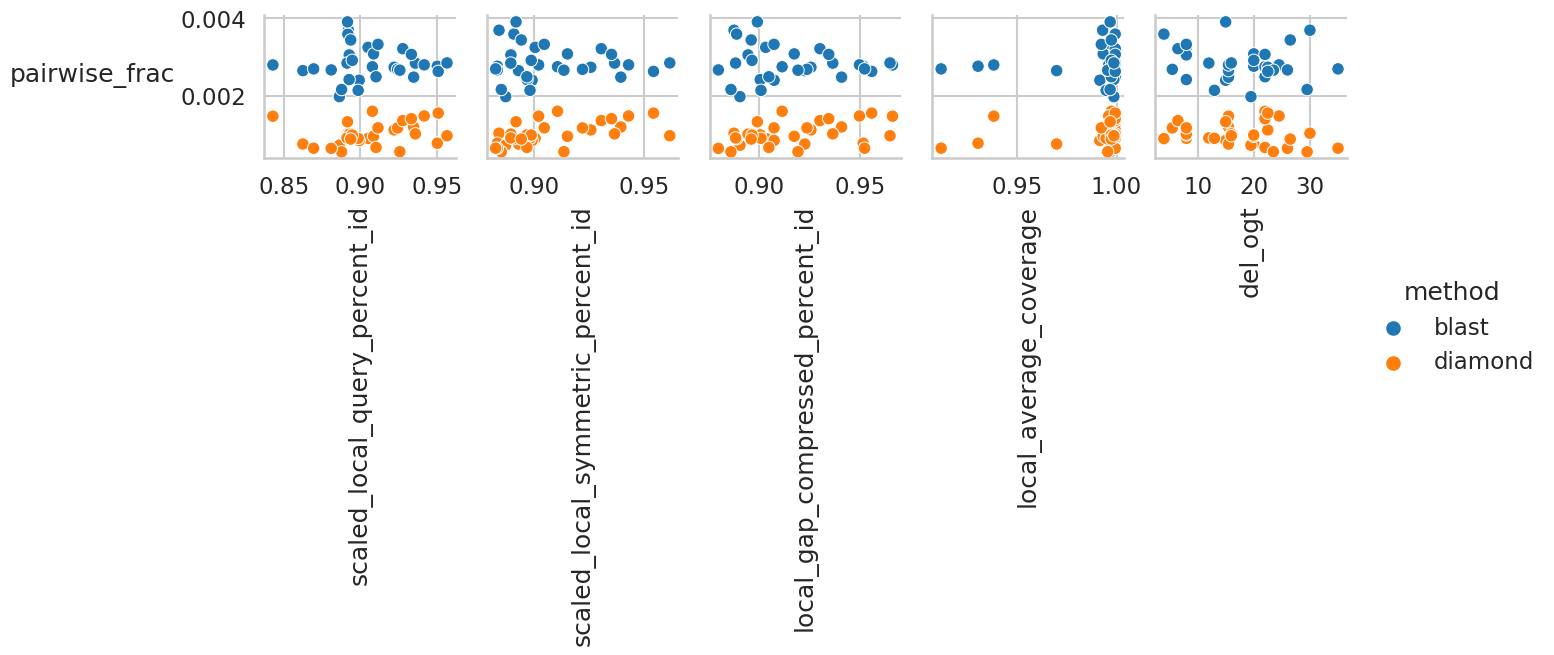

In [60]:
g = sns.pairplot(df_, y_vars=['pairwise_frac'], x_vars=['scaled_local_query_percent_id',
       'scaled_local_symmetric_percent_id', 'local_gap_compressed_percent_id',
       'local_average_coverage', 'del_ogt'], hue='method', aspect=1)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

Diamond returns less of the pairwise space, but we knew that already. The question is - is it consistant? Is the reduction in returned hits uniform with these other inputs?

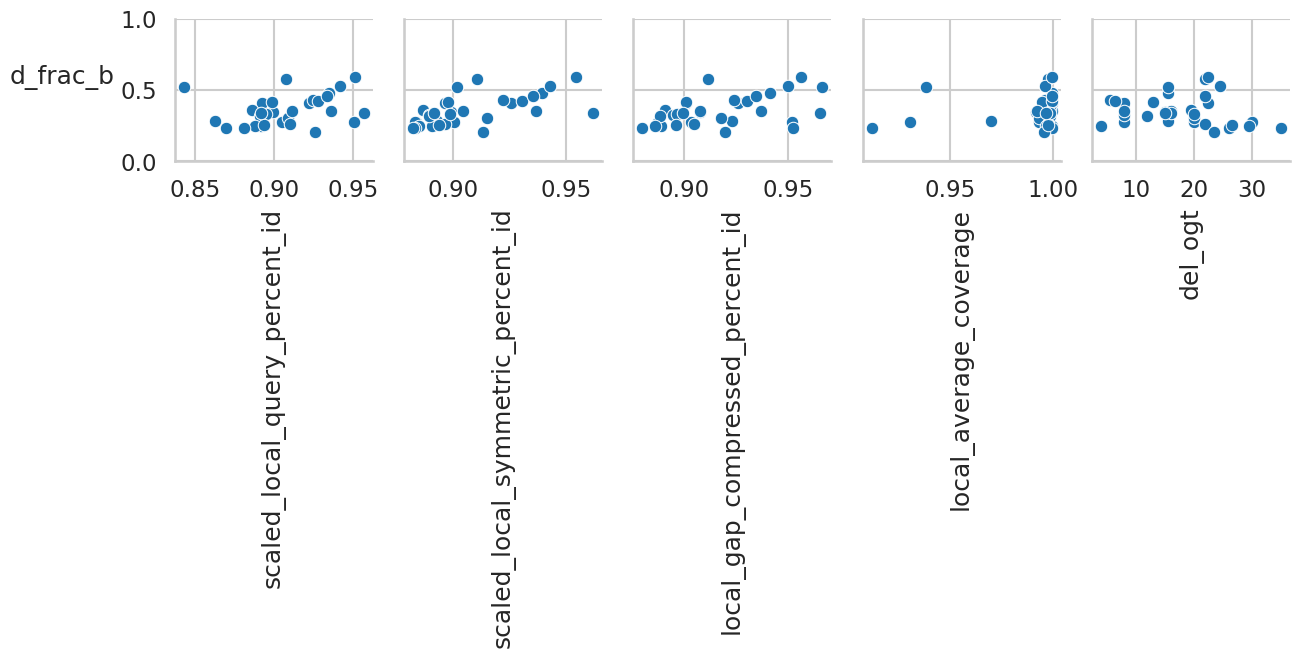

In [62]:
g = sns.pairplot(df, y_vars=['d_frac_b'], x_vars=['scaled_local_query_percent_id',
       'scaled_local_symmetric_percent_id', 'local_gap_compressed_percent_id',
       'local_average_coverage', 'del_ogt'], aspect=1)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    ax.set_ylim(0,1)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

Two observation. Neither are perfect trend but are definately noticable:
- The more similar the taxa are as measured by local symmetric percent ID, the closer diamond gets to blast in terms of return
- The most different taxa in terms of of OGT bias diamond towards fewer hits more so than smaller differences in temperature

__Conclusions__
> Diamond will bias protein pairs towards taxa pairs with closer OGT and whose 16s is more similar. It is likely that the protein pairs diamond is preferentially "missing" for unsimilar taxa are very disimilar protein pairs that blast found baarely a word match for. But the bias is definately there.